In [20]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',1000)
pd.set_option('display.max_colwidth', 500)


import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from pywaffle import Waffle

from cycler import cycler

In [21]:
peaks = pd.read_csv("peaks.csv")
peaks.head()

,PEAKID,PKNAME,PKNAME2,LOCATION,HEIGHTM,HEIGHTF,HIMAL,REGION,OPEN,UNLISTED,TREKKING,TREKYEAR,RESTRICT,PHOST,PSTATUS,PEAKMEMO,PYEAR,PSEASON,PEXPID,PSMTDATE,PCOUNTRY,PSUMMITERS,PSMTNOTE,REFERMEMO,PHOTOMEMO
0,AMAD,Ama Dablam,Amai Dablang,Khumbu Himal,6814,22356,12,2,True,False,False,NaN,NaN,1,2,"Other map altitudes:\r\n 6814m - HMG-MT, HMG-Finn, Shangri La \r\n 6828m - NGS/Washburn Everest, Kielkowski\r\n 6856m - Nepa, Schneider, Japan MMW\r\n\r\nAltitude milestones on Ama Dablam:\r\n\r\n 5950m - Yellow Tower\r\n 6050m - Grey Tower\r\n 6150m - Mushroom Ridge\r\n 6600m - Avalanche site",1961.0,1,AMAD61101,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michael Ward",NaN,NaN,"W Face (High 126:5 May 1993)\r\nSE Face (High 144:38 Nov 1994)\r\nNW Face (High 167:66 Jul 1996)\r\nNE Face (High 218:77 Jan 2001)\r\nNW Face (AAJ 71:6 1997) (Slovene 1996 route) \r\nSE Face (AAJ 69:240 1995)\r\nSW Side (AAJ 64:225 1990)\r\nNE Face (AAJ 58:236 1984, 60:222 1986, 61:33 1987)\r\nW Face (AAJ 61:229 1987) (various routes)\r\nW Side (AAJ 57:1 1983)\r\nS Ridge/SW Face (AAJ 53:450 1980)"
1,AMPG,Amphu Gyabjen,NaN,Khumbu Himal (N of Ama Dablam),5630,18471,12,2,True,False,False,NaN,Opened in 2002,1,2,"Other map altitudes:\r\n 5630m - HMG-MT, HMG-Finn, Nepa, Shangri La\r\n 5647m - NGS/Washburn Everest, Kielkowski\r\n 5650m - Schneider, Japan MMW",1953.0,1,AMPG53101,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN,NaN,NaN
2,ANN1,Annapurna I,NaN,Annapurna Himal,8091,26545,1,5,True,False,False,NaN,NaN,1,2,"Other map altitudes:\r\n 8091m - HMG-MT, HMG-Finn, Nepa, Shangri La, Schneider, Japan MMW, Leomann",1950.0,1,ANN150101,Jun 03,France,"Maurice Herzog, Louis Lachenal",NaN,Dyhrenfurth history 1950-1977 (MM 58:44-47 Nov 1977),S Face (High 122:3 Jan 1993) (Beghin accident)\r\nN Face (High 205:72 Dec 1999)\r\nN Side (MM 88:41 Nov 1982)\r\nNW Face (MM 58:46 Nov 1977)\r\nS Face (MM 58:46 Nov 1977)\r\nS Face (MM 12:20 Nov 1970) (Bonington route)\r\nW Face (AAJ 66:220 1992) (various routes)
3,ANN2,Annapurna II,NaN,Annapurna Himal,7937,26040,1,5,True,False,False,NaN,NaN,1,2,"Other map altitudes:\r\n 7937m - HMG-MT, HMG-Finn, Nepa, Shangri La, Schneider, Japan MMW, Leomann",1960.0,1,ANN260101,May 17,"UK, Nepal","Richard Grant, Chris Bonington, Ang Nyima Sherpa",NaN,Dyhrenfurth history 1960-1976 (MM 51:36-37 Sep 1976),N Face (MM 51:36 Sep 1976)
4,ANN3,Annapurna III,NaN,Annapurna Himal,7555,24787,1,5,True,False,False,NaN,NaN,1,2,"Other map altitudes:\r\n 7555m - HMG-MT, HMG-Finn, Nepa, Shangri La, Schneider, Japan MMW, Leomann",1961.0,1,ANN361101,May 06,India,"Mohan S. Kohli, Sonam Gyatso, Sonam Girmi",NaN,NaN,S Side (MM 125:11 Jan 1989)\r\nSW Face (MM 71:13 Jan 1980)\r\nS Buttress (AAJ 58:249 1984)\r\nW Face (AAJ 53:60 1979)\r\nSW Face (High 228:80 Nov 2001)


In [22]:
exped = pd.read_csv("exped_w_years.csv")
exped.head()

/Users/jessicasmckenzie/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
0,ANN260101,ANN2,1960,1,1,NW Ridge-W Ridge,NaN,NaN,NaN,UK,J. O. M. Roberts,NaN,True,False,False,False,1st,NaN,NaN,NaN,False,False,"India, Nepal",Marshyangdi->Hongde->Sabje Khola,1960-03-15,1960-05-17,1530.0,63,0,NaN,1,NaN,7937.0,False,False,False,6.0,0.0,10.0,2.0,0.0,9.0,1.0,0.0,False,True,False,True,False,True,False,False,False,Climbed Annapurna IV (ANN4-601-01),"BC(15/03,3350m),ABC(4575m),C1(5365m),C2(5800m),C3(26/04,6400m),C4(30/04,6900m),C5(15/05,7270m),C6(16/05,7200m),Smt(17/05)",NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,2442047.0
1,ANN269301,ANN2,1969,3,1,NW Ridge-W Ridge,NaN,NaN,NaN,Yugoslavia,Ales Kunaver,Mountaineering Club of Slovenia,True,False,False,False,2nd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Hongde->Sabje Khola,1969-09-25,1969-10-22,1800.0,27,31,1969-10-26,1,NaN,7937.0,False,False,False,6.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,False,False,Climbed Annapurna IV (ANN4-693-02),"LowBC(25/09,3950m),BC(27/09,4650m),C1(27/09,5300m),C2(6000m),C3(6400m),C4,C5(7350m),C6(7250m),Smt(22/10)","Summited after sunset, returned to C6 at 2:30 am.\r\n\r\n\r\nJerin - 7 Nov 1969\r\n\r\nArrive KTM Thursday Draslar, Mlekuz and Jerin; rest tomorrow afternoom by charter. Draslar fingers OK, but one toe uncertain still.\r\n\r\nStarted for summit 9 am. 3 pm in afternoon still very low. At 6 pm last part and descended by moonlight very bright, but very cold. Days shorter than in spring (at 5 pm getting dark).\r\n\r\nWere exhausted by time returned to camp, could not have come down alone.\r\n\r\...",Draslar frostbitten hands and feet,NaN,NaN,NaN,NaN,False,False,NaN,NaN,2445501.0
2,ANN273101,ANN2,1973,1,1,W Ridge-N Face,NaN,NaN,NaN,Japan,Yukio Shimamura,Sangaku Doshikai Annapurna II Expedition 1973,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,1973-03-16,1973-05-06,2030.0,51,0,NaN,1,NaN,7937.0,False,False,False,5.0,0.0,6.0,1.0,0.0,8.0,0.0,0.0,False,False,True,False,False,False,False,False,False,NaN,"BC(16/03,3300m),C1(21/03,4200m),C2(10/04,5000m),C3(14/04,6000m),C4(23/04,6750m),C5(04/05,7300m),Smt(06/05)","Summit team of 3 left from C6, 2 returned from 6900m, Kondo summited and bivouaced at 7330m on descent. MM29:13\r\n\r\nSakashita - 23 May 1973\r\n\r\nOthers arrive KTM on 25th by bus.\r\n\r\nKondo, Ogawa and Sakashita tried to reach summit. Very late, so 2 members stayed in biv and only Kondo to summit about 8:30 pm.\r\n\r\n7300m on West Ridge.\r\n\r\nLeft C5 6:00 am on 6 May, reached biv site at 12:00. Attack time very short, so Ogawa stayed there and other 2 went on. Leader on walkie-talk...",NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,2446797.0
3,ANN278301,ANN2,1978,3,1,N Face-W Ridge,NaN,NaN,NaN,UK,Richard J. Isherwood,British Annapurna II Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Marshyangdi->Pisang->Salatang Khola,1978-09-08,1978-10-02,NaN,24,27,1978-10-05,4,Abandoned at 7000m (on A-IV) due to bad weather,7000.0,False,False,False,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False,False,False,False,NaN,"BC(08/09,5190m),xxx(02/10,7000m)","Alpine-style ascent. Originally planned N Face attempt, switched to NW Ridge after avalanching on route.\r\n\r\n\r\nCollister - 15 Oct 78\r\n\r\nNo camps above base - just took 1 tent with us - reached 23,000 feet on 30 Sept and technically quite easy - would have reached summit (via original route of North Face to West Ridge and were just below Annapurna 

In [23]:
members = pd.read_csv("members.csv")
members.head()

/Users/jessicasmckenzie/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,8,9,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,37,47,48,49,50,51,52,54,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EXPID,MEMBID,PEAKID,MYEAR,MSEASON,FNAME,LNAME,SEX,AGE,BIRTHDATE,YOB,CALCAGE,CITIZEN,STATUS,RESIDENCE,OCCUPATION,LEADER,DEPUTY,BCONLY,NOTTOBC,SUPPORT,DISABLED,HIRED,SHERPA,TIBETAN,MSUCCESS,MCLAIMED,MDISPUTED,MSOLO,MTRAVERSE,MSKI,MPARAPENTE,MSPEED,MHIGHPT,MPERHIGHPT,MSMTDATE1,MSMTDATE2,MSMTDATE3,MSMTTIME1,MSMTTIME2,MSMTTIME3,MROUTE1,MROUTE2,MROUTE3,MASCENT1,MASCENT2,MASCENT3,MO2USED,MO2NONE,MO2CLIMB,MO2DESCENT,MO2SLEEP,MO2MEDICAL,MO2NOTE,DEATH,DEATHDATE,DEATHTIME,DEATHTYPE,DEATHHGTM,DEATHCLASS,AMS,WEATHER,INJURY,INJURYDATE,INJURYTIME,INJURYTYPE,INJURYHGTM,DEATHNOTE,MEMBERMEMO,NECROLOGY,MSMTBID,MSMTTERM,HCN,MCHKSUM
0,AMAD78301,01,AMAD,1978.0,3,Jean Robert,Clemenson,M,0,NaN,1938.0,40.0,France,Leader,"Argentiere, Haute-Savoie, France",Alpine guide,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,0.0,0.0,0.0,False,False,False,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,4.0,0.0,2426937.0
1,AMAD78301,02,AMAD,1978.0,3,Bernard,Dufour,M,0,NaN,1936.0,41.0,France,Deputy Leader,"Les Houches, Haute-Savoie, France",Alpine guide,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,6000.0,1978-10-21,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,0.0,0.0,0.0,False,False,False,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,4.0,0.0,2426501.0
2,AMAD78301,03,AMAD,1978.0,3,Philippe,Gerard,M,0,NaN,1950.0,27.0,France,Climber,"Troyes, Val-de-Marne, France",Professional photographer,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,0.0,0.0,0.0,False,False,False,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,4.0,0.0,2431569.0
3,AMAD78301,04,AMAD,1978.0,3,Eric,Lasserre,M,0,NaN,1937.0,40.0,France,Exp Doctor,"Chamonix, Haute-Savoie, France",Physician,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,True,6000.0,1978-10-21,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,0.0,0.0,0.0,False,False,False,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,4.0,0.0,2426809.0
4,AMAD78301,05,AMAD,1978.0,3,Guy,Peters,M,0,NaN,1944.0,34.0,France,Climber,"Les Houches, Haute-Savoie, France",Alpine guide,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,NaN,False,NaN,NaN,0.0,0.0,0.0,False,False,False,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,4.0,0.0,2429215.0


In [24]:
members.DEATHTYPE.value_counts()

0.0     69032
7.0       358
4.0       317
1.0        91
10.0       58
9.0        48
3.0        40
2.0        32
11.0       28
8.0        26
5.0        25
6.0        16
12.0       10
Name: DEATHTYPE, dtype: int64

In [25]:
#getting rid of Unspecified,Unknown, and Other
df = members[members.DEATHTYPE != 0.0]
df = df[df.DEATHTYPE != 11.0]
df = df[df.DEATHTYPE != 12.0]
df.DEATHTYPE.value_counts()

7.0     358
4.0     317
1.0      91
10.0     58
9.0      48
3.0      40
2.0      32
8.0      26
5.0      25
6.0      16
Name: DEATHTYPE, dtype: int64

In [26]:
plt.rcdefaults()
plt.rcParams.update({
    'lines.linewidth': 3,
    'legend.frameon' : False,
    'legend.borderaxespad' : 0,
    'axes.facecolor': 'white',
    'axes.labelcolor' : 'black',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.edgecolor': 'white',
    'patch.edgecolor': 'white',
    'axes.titlepad' : 20,
    'axes.labelpad' : 5,
    'patch.edgecolor': 'white',
    'patch.linewidth': 0,
    'xtick.major.size': 10,
    'xtick.minor.size': 0,
    'ytick.major.size': 10,
    'ytick.minor.size': 0,
    'xtick.color' : 'black', 
    'ytick.color' : 'black',
    'font.size': 16.0,
    'font.serif' : 'Times New Roman',
    'font.family' : 'serif',
    'savefig.bbox' : 'tight',
    'savefig.edgecolor': 'white',
    'savefig.facecolor': 'white',
    'figure.subplot.left': 0.08,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.07,
    'figure.facecolor': 'white',
    'svg.fonttype': 'path',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

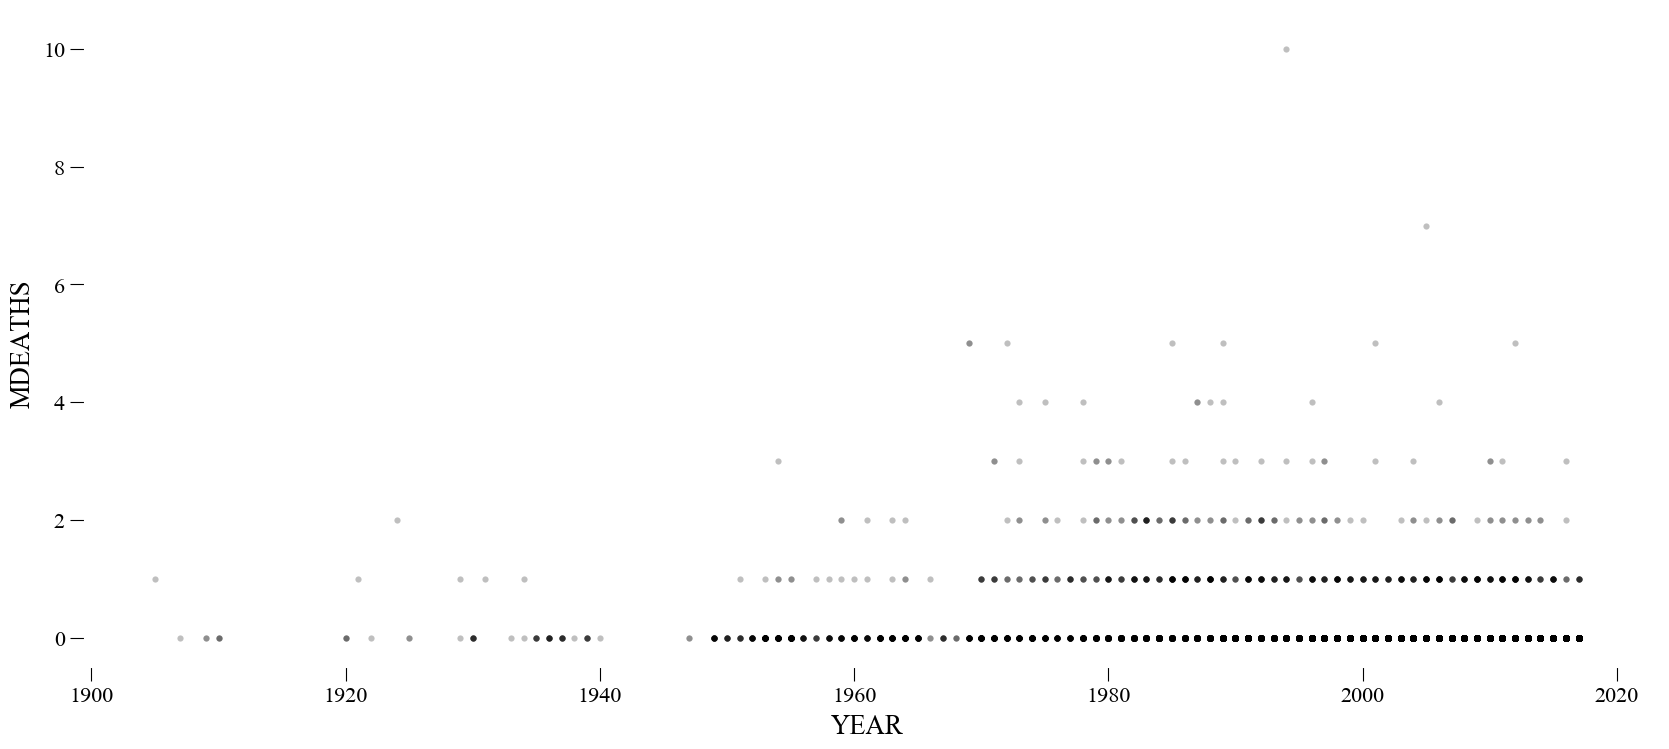

In [27]:
ax = exped.plot(y='MDEATHS', x='YEAR', kind='scatter', figsize=(18,8), alpha=0.25, color='black')
plt.savefig("Expedition_deaths.pdf")
plt.show()


In [28]:
exped.sort_values('MDEATHS', ascending=False).head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM
3042,PISA94301,PISA,1994,3,1,SW Face-W Ridge,NaN,NaN,NaN,Germany,Stefan Hasenkopf,DAV (German Alpine Club),True,False,False,False,NaN,NaN,NaN,NaN,False,False,Switzerland,Marshyangdi->Chame->Pisang,1994-11-11,1994-11-13,NaN,2,0,NaN,1,Fatal accident after success,6091.0,False,False,False,1.0,0.0,10.0,10.0,10.0,1.0,1.0,1.0,False,False,True,False,False,False,False,False,False,NaN,"BC(11/11),ABC(12/11),Smt(13/11)","From Kathmandu Post (Nov 1994)\r\n\r\nKathmandu - In the [second] biggest disaster of mountaineering history in Nepal, 9 Germans, a Swiss national and a Nepalese mountain guide were found dead presumably due to snowslide.\r\n After a continuous three-day search, November 16, 17, 18, the bodies of the mountaineers were located 6091 meters below Pisang Peak in Manang district on Sunday. They are said to have successfully have reached the peak.\r\n According to Rotheingshofer Sigmund of the...",NaN,NaN,International Trekkers (Intrek Asia),NaN,NaN,False,False,NaN,NaN,2453014.0
5174,KGUR05301,KGUR,2005,3,1,SW Face-NW Ridge,NaN,NaN,NaN,France,Daniel Stolzenberg,Mt. Kang Guru Expedition 2005,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Besisahar->Jagat->Pisang->Ngawal->Kanla->BC Nar,2005-10-13,2005-10-18,NaN,5,0,NaN,6,Abandoned at 6000m due to avalanche killing all 7 members and 11 of 12 staff,6000.0,False,False,False,2.0,0.0,7.0,0.0,7.0,11.0,0.0,11.0,False,False,True,False,False,False,False,False,False,NaN,"BC(13/10,4200m),C1(16/10,5300m),C2(17/10,6000m),xxx(18/10,6000m)",The expedition team reached BC on Oct 13 at 4200-4300m (Dawa says that is the only place wide enough for BC).\r\nPerformed puja on Oct 14.\r\nEstablished C1 on Oct 15 at 5300m\r\nUsed C1 on Oct 16 by members and staff.\r\nEstablished C2 on Oct 17 at 6000m (about) (not occupied)\r\nOct 18 members climbed upt o C2 for acclimatization and returned to C1 same day.\r\nOct 19 rest day. Snowfall and wind started at about 12:00 hours. C1 was covered with snow about 3 feet.\r\nOct 20 members and staf...,7 French and 11 Nepali staff killed by avalanche,NaN,Churen Himal Treks,False,False,False,False,False,NaN,2456252.0
483,EVER89103,EVER,1989,1,1,Khumbutse-W Ridge-N Face (Hornbein Couloir),NaN,NaN,NaN,Poland,Eugeniusz Chrobak,Eugeniusz Chrobak Spring 1989 Everest Expedition,True,False,False,False,96th,NaN,NaN,NaN,False,False,"Canada, Mexico, UK, USA",Khumbu Valley,1989-03-26,1989-05-24,2000.0,59,0,NaN,1,NaN,8850.0,False,False,False,5.0,0.0,19.0,2.0,5.0,0.0,0.0,0.0,True,True,False,True,True,False,False,False,False,NaN,"BC(26/03,5350m),C1(01/04,5850m),C2(04/04,6850m),C3(14/04,7200m),C4(21/04,7500m),C5(11/05,8000m),Smt(24/05)",BC at normal site\r\nC4 at top of West Shoulder\r\nC5 at bottom of Hornbein Couloir.\r\n\r\n1st summit attempt by Carlos alone from C4 11th May at 5:00 pm and 12th May 3:00 am reached 8200m in Hornbein Couloir; down to C5 at 5:00 am because throat trouble and was given oxygen in C5 for exhaustion and on down. \r\n\r\n2nd attempt 22 May from C5 by 2 members [Dasal and Gardzielewski] with oxygen at 5:00 am; fixed rope up Hornbein to snowfield at its top (had fixed lower part on 21 May); reache...,5 fatalites on Khumbutse; Lobodzinski altitude sickness; Todd back problem,NaN,Asian Trekking,False,False,False,False,False,NaN,2449795.0
2379,MANA72101,MANA,1972,1,1,NE Face,NaN,NaN,NaN,S Korea,Kim Jung-Sup,Second Korean Manaslu Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,Japan,NaN,1972-03-11,1972-03-2

In [29]:
exped['total_deaths'] = exped['MDEATHS'] + exped['HDEATHS']

In [32]:
exped.groupby('PEAKID').total_deaths.sum().head(13)

PEAKID
ACHN     0.0
AMAD    28.0
AMOT     0.0
AMPG     0.0
AMPH     0.0
AMPM     0.0
ANID     0.0
ANN1    71.0
ANN2     6.0
ANN3     9.0
ANN4     5.0
ANNE     1.0
ANNM     3.0
Name: total_deaths, dtype: float64

In [31]:
exped.sort_values('total_deaths', ascending=False).head()

,EXPID,PEAKID,YEAR,SEASON,HOST,ROUTE1,ROUTE2,ROUTE3,ROUTE4,NATION,LEADERS,SPONSOR,SUCCESS1,SUCCESS2,SUCCESS3,SUCCESS4,ASCENT1,ASCENT2,ASCENT3,ASCENT4,CLAIMED,DISPUTED,COUNTRIES,APPROACH,BCDATE,SMTDATE,SMTTIME,SMTDAYS,TOTDAYS,TERMDATE,TERMREASON,TERMNOTE,HIGHPOINT,TRAVERSE,SKI,PARAPENTE,CAMPS,ROPE,TOTMEMBERS,SMTMEMBERS,MDEATHS,TOTHIRED,SMTHIRED,HDEATHS,NOHIRED,O2USED,O2NONE,O2CLIMB,O2DESCENT,O2SLEEP,O2MEDICAL,O2TAKEN,O2UNKWN,OTHERSMTS,CAMPSITES,ROUTEMEMO,ACCIDENTS,ACHIEVMENT,AGENCY,COMRTE,STDRTE,PRIMRTE,PRIMMEM,PRIMREF,PRIMID,CHKSUM,total_deaths
5174,KGUR05301,KGUR,2005,3,1,SW Face-NW Ridge,NaN,NaN,NaN,France,Daniel Stolzenberg,Mt. Kang Guru Expedition 2005,False,False,False,False,NaN,NaN,NaN,NaN,False,False,NaN,Besisahar->Jagat->Pisang->Ngawal->Kanla->BC Nar,2005-10-13,2005-10-18,NaN,5,0,NaN,6,Abandoned at 6000m due to avalanche killing all 7 members and 11 of 12 staff,6000.0,False,False,False,2.0,0.0,7.0,0.0,7.0,11.0,0.0,11.0,False,False,True,False,False,False,False,False,False,NaN,"BC(13/10,4200m),C1(16/10,5300m),C2(17/10,6000m),xxx(18/10,6000m)",The expedition team reached BC on Oct 13 at 4200-4300m (Dawa says that is the only place wide enough for BC).\r\nPerformed puja on Oct 14.\r\nEstablished C1 on Oct 15 at 5300m\r\nUsed C1 on Oct 16 by members and staff.\r\nEstablished C2 on Oct 17 at 6000m (about) (not occupied)\r\nOct 18 members climbed upt o C2 for acclimatization and returned to C1 same day.\r\nOct 19 rest day. Snowfall and wind started at about 12:00 hours. C1 was covered with snow about 3 feet.\r\nOct 20 members and staf...,7 French and 11 Nepali staff killed by avalanche,NaN,Churen Himal Treks,False,False,False,False,False,NaN,2456252.0,18.0
2379,MANA72101,MANA,1972,1,1,NE Face,NaN,NaN,NaN,S Korea,Kim Jung-Sup,Second Korean Manaslu Expedition,False,False,False,False,NaN,NaN,NaN,NaN,False,False,Japan,NaN,1972-03-11,1972-03-27,NaN,16,0,NaN,6,Abandoned at 6500m due to fatal avalanche at C3,6500.0,False,False,False,3.0,0.0,12.0,0.0,5.0,10.0,0.0,10.0,False,False,True,False,False,False,False,False,False,NaN,"BC(11/03,4300m),C1(14/03,5200m),C2(22/03,5850m),C3(27/03,6500m),xxx(27/03,6500m)","Hawley Reuters Dispatch - 14 Apr 72\r\n\r\nThree persons, one Korean and two Sherpas, survived huge avalanche that completely destroyed Koreans C3 (6500m) on Manaslu early morning of April 10.\r\n\r\nKorean is Kim Yae-Sup who actually survived five avalanches and gale force winds that terrible morning and who briefly recounted his horror to Reuter's this morning in Shanta Bhawan Hospital here while nurses gently bathed in warm water his badly frostbitten feet. He was brought to Kathmandu ex-...",5 members and 10 Sherpas killed by avalanche,NaN,"Unknown, if any",NaN,True,False,False,NaN,NaN,2444546.0,15.0
3042,PISA94301,PISA,1994,3,1,SW Face-W Ridge,NaN,NaN,NaN,Germany,Stefan Hasenkopf,DAV (German Alpine Club),True,False,False,False,NaN,NaN,NaN,NaN,False,False,Switzerland,Marshyangdi->Chame->Pisang,1994-11-11,1994-11-13,NaN,2,0,NaN,1,Fatal accident after success,6091.0,False,False,False,1.0,0.0,10.0,10.0,10.0,1.0,1.0,1.0,False,False,True,False,False,False,False,False,False,NaN,"BC(11/11),ABC(12/11),Smt(13/11)","From Kathmandu Post (Nov 1994)\r\n\r\nKathmandu - In the [second] biggest disaster of mountaineering history in Nepal, 9 Germans, a Swiss national and a Nepalese mountain guide were found dead presumably due to snowslide.\r\n After a continuous three-day search, November 16, 17, 18, the bodies of the mountaineers were located 6091 meters below Pisang Peak in Manang district on Sunday. They are said to have successfully have reached the peak.\r\n According to Rotheingshofer Sigmund of the...",NaN,NaN,International Trekkers (Intrek Asia),NaN,NaN,False,False,NaN,NaN,2453014.0,11.0
2805,GANG71301,GANG,1971,3,1,W Ridge from S,NaN,NaN,NaN,Japan,Kiyoshi Shimizu,Nagano Mountaineering Assoc,True,False,False,False,3rd,NaN,NaN,NaN,False,False,NaN,Pokhara->Modi Khola->Annapurna Sanctuary (BC),1971-09-07,1971-10-15,1415.0,38,45,1971-10-22

<Figure size 640x480 with 0 Axes>

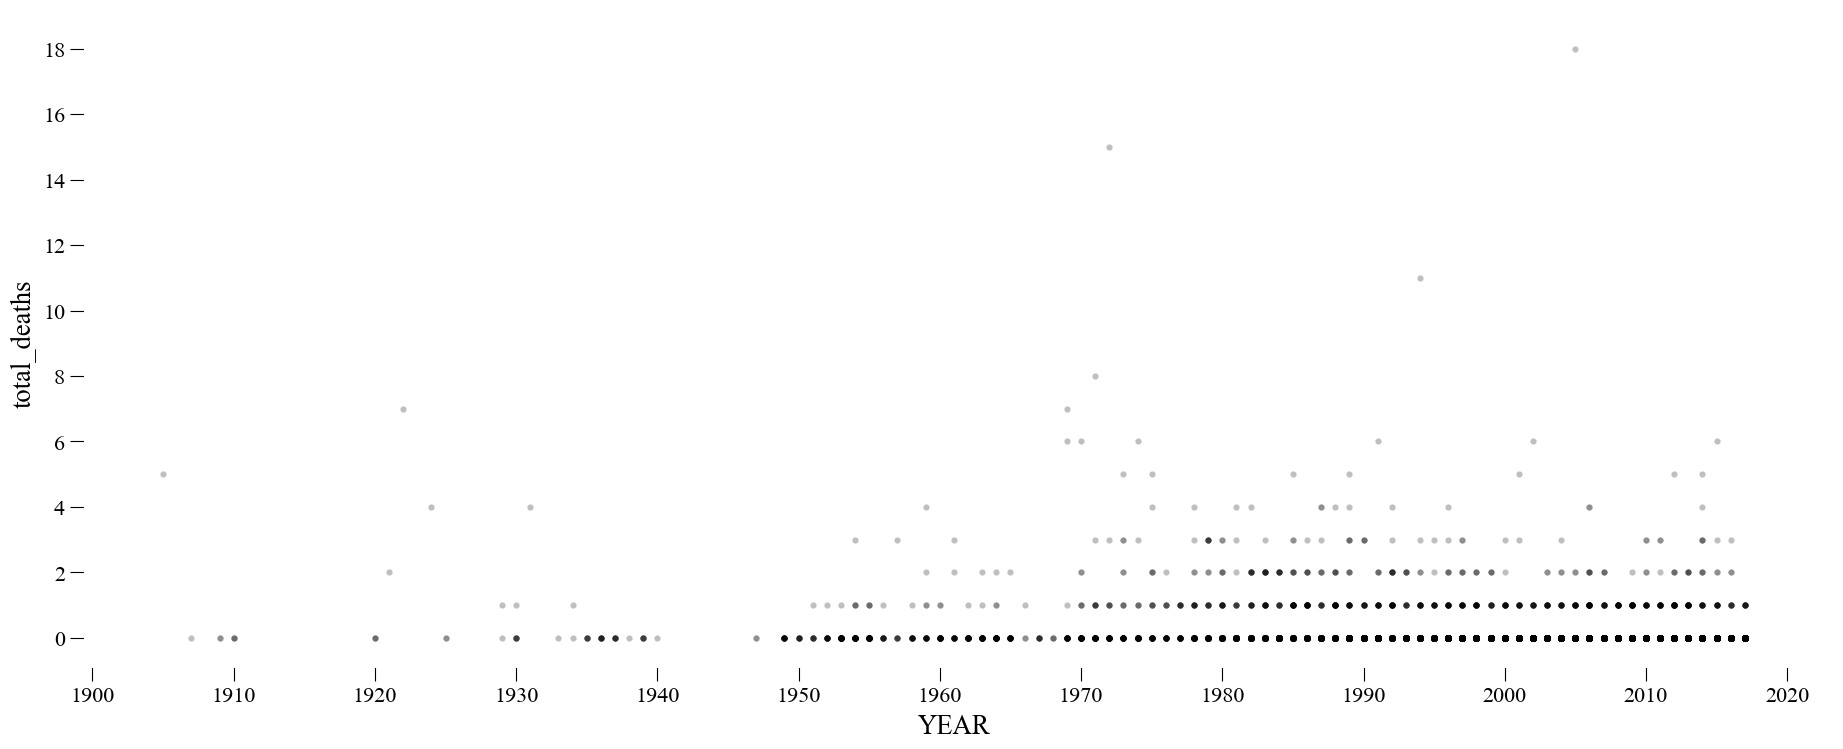

In [33]:
ax = exped.plot(x='YEAR',y='total_deaths', kind='scatter', figsize=(20,8), alpha=0.25, color='black')
ax.set_yticks([0,2,4,6,8,10,12,14,16,18])
ax.set_xticks([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])

plt.savefig("Deaths_per_exped.pdf")
plt.show()

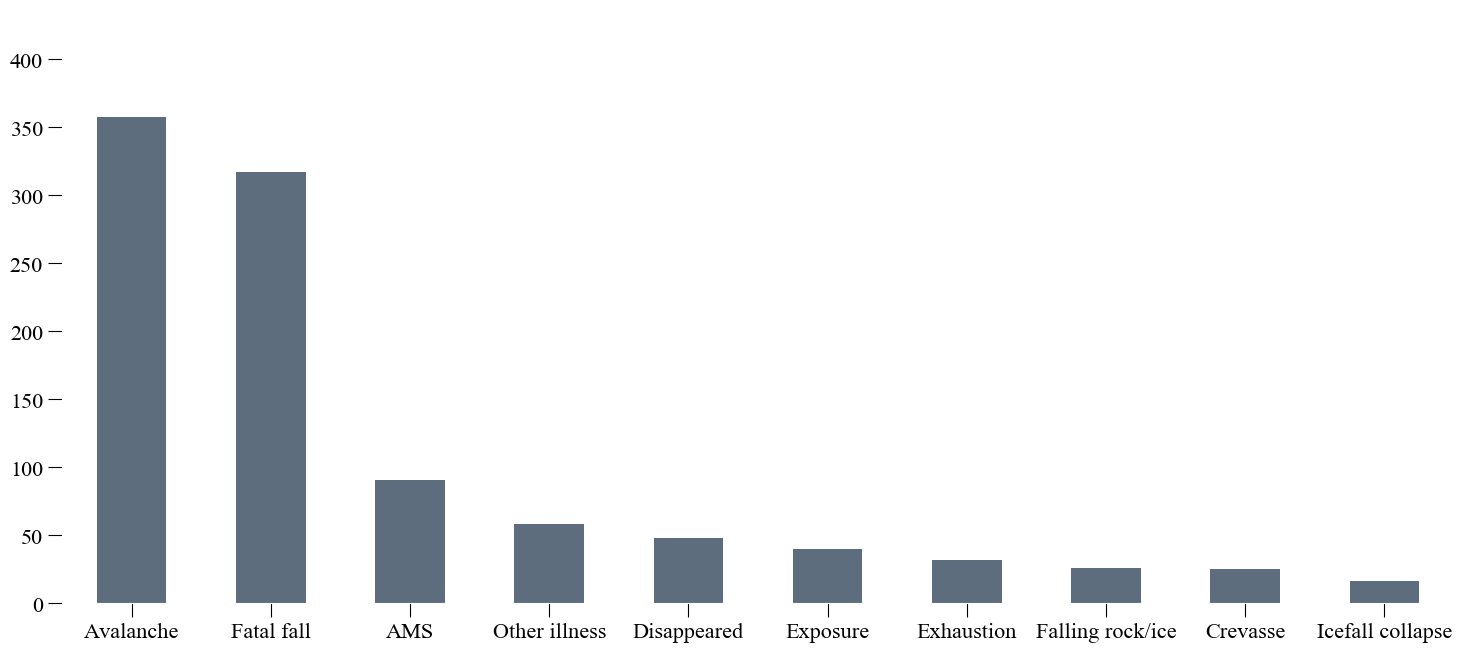

In [11]:
ax = df.DEATHTYPE.value_counts().plot(kind='bar', figsize=(16,8), color = '#5d6d7e')
ax.set_xticklabels(['Avalanche', 'Fatal fall', 'AMS', 'Other illness', 'Disappeared', 'Exposure', 'Exhaustion', 'Falling rock/ice', 'Crevasse', 'Icefall collapse'])

plt.xticks(rotation='horizontal')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.savefig("Cause_of_death.pdf")
plt.show()

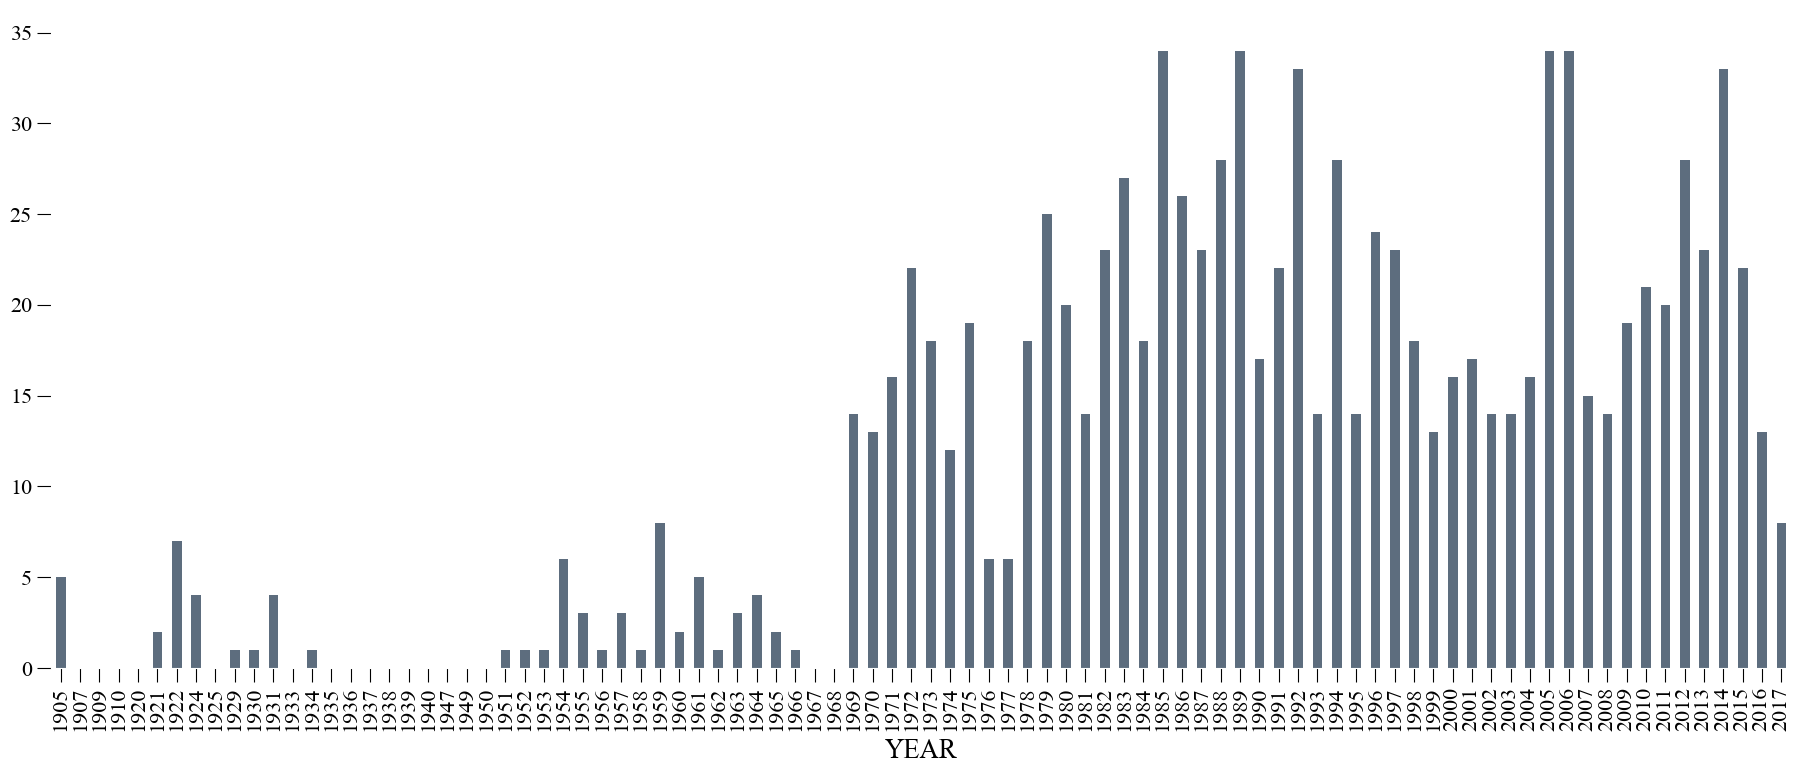

In [12]:
ax = exped.groupby('YEAR').total_deaths.sum().plot(kind='bar',figsize=(20,8), color='#5d6d7e')
#plt.xticks(rotation='horizontal')
plt.savefig("deaths_per_year.pdf")
plt.show()

In [13]:
exped['total_ppl'] = exped['TOTMEMBERS'] + exped['TOTHIRED']

In [14]:
exped['total_death_rate'] = exped['total_deaths'] / exped['total_ppl']

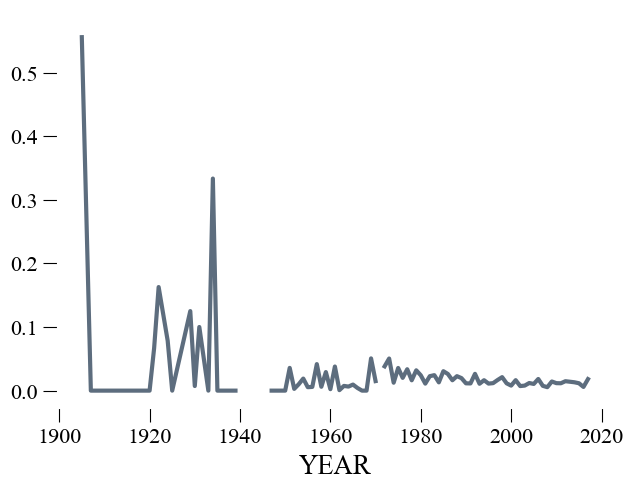

In [15]:
ax = exped.groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')

plt.savefig("death_rate.pdf")
plt.show()

In [16]:
df = exped[exped.YEAR > 1949]

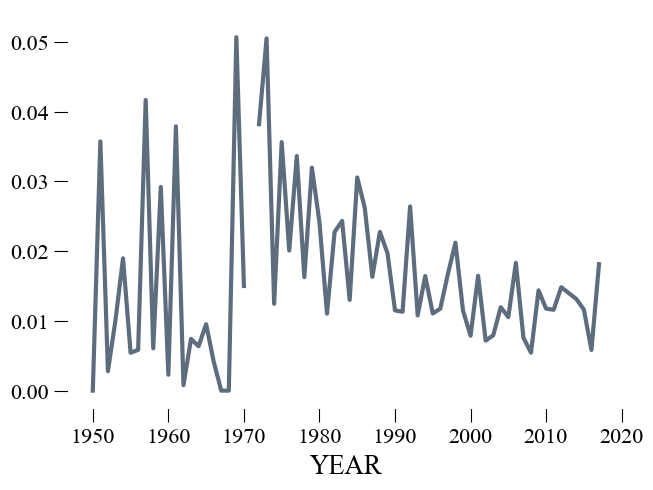

In [17]:
ax = df.groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')

plt.savefig("death_rate_1950_on.pdf")
plt.show()

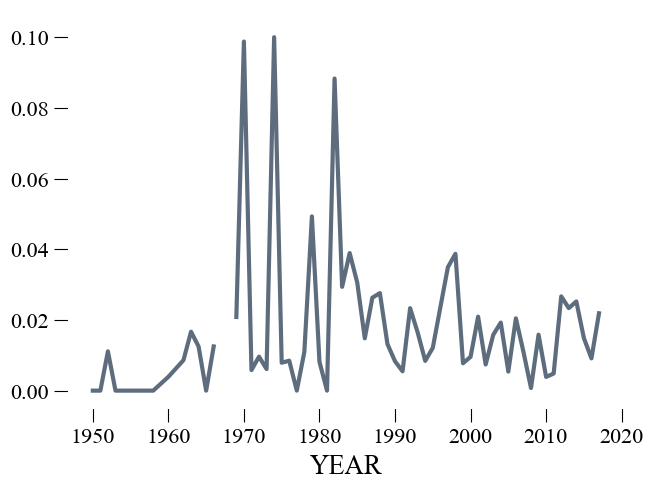

In [18]:
ax = df[df['PEAKID'] == 'EVER'].groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')


plt.savefig("death_rate_on_ever.pdf")
plt.show()

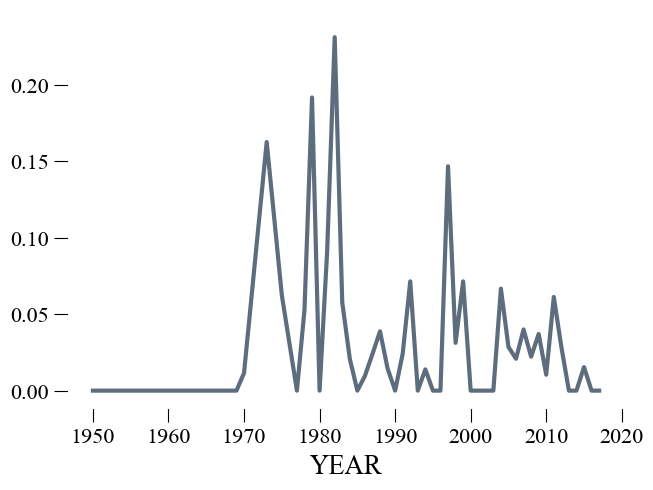

In [19]:
ax = exped[exped['PEAKID'] == 'ANN1'].groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')

plt.savefig("death_rate_on_ANN1.pdf")

plt.show()



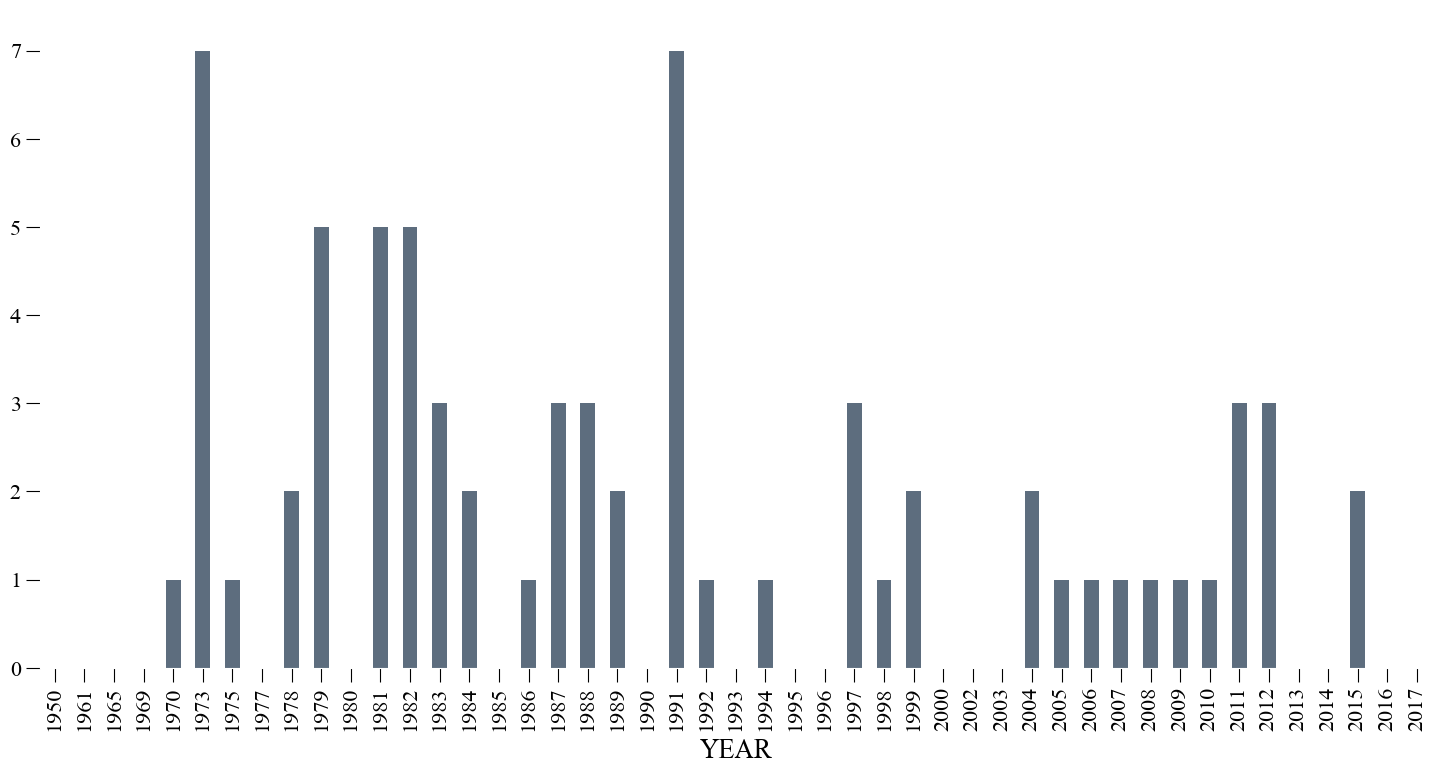

In [20]:
ax = exped[exped['PEAKID'] == 'ANN1'].groupby('YEAR').total_deaths.sum().plot(kind='bar',figsize=(16,8), color='#5d6d7e')

plt.show()
plt.savefig("deaths_per_year_ANN1.pdf")

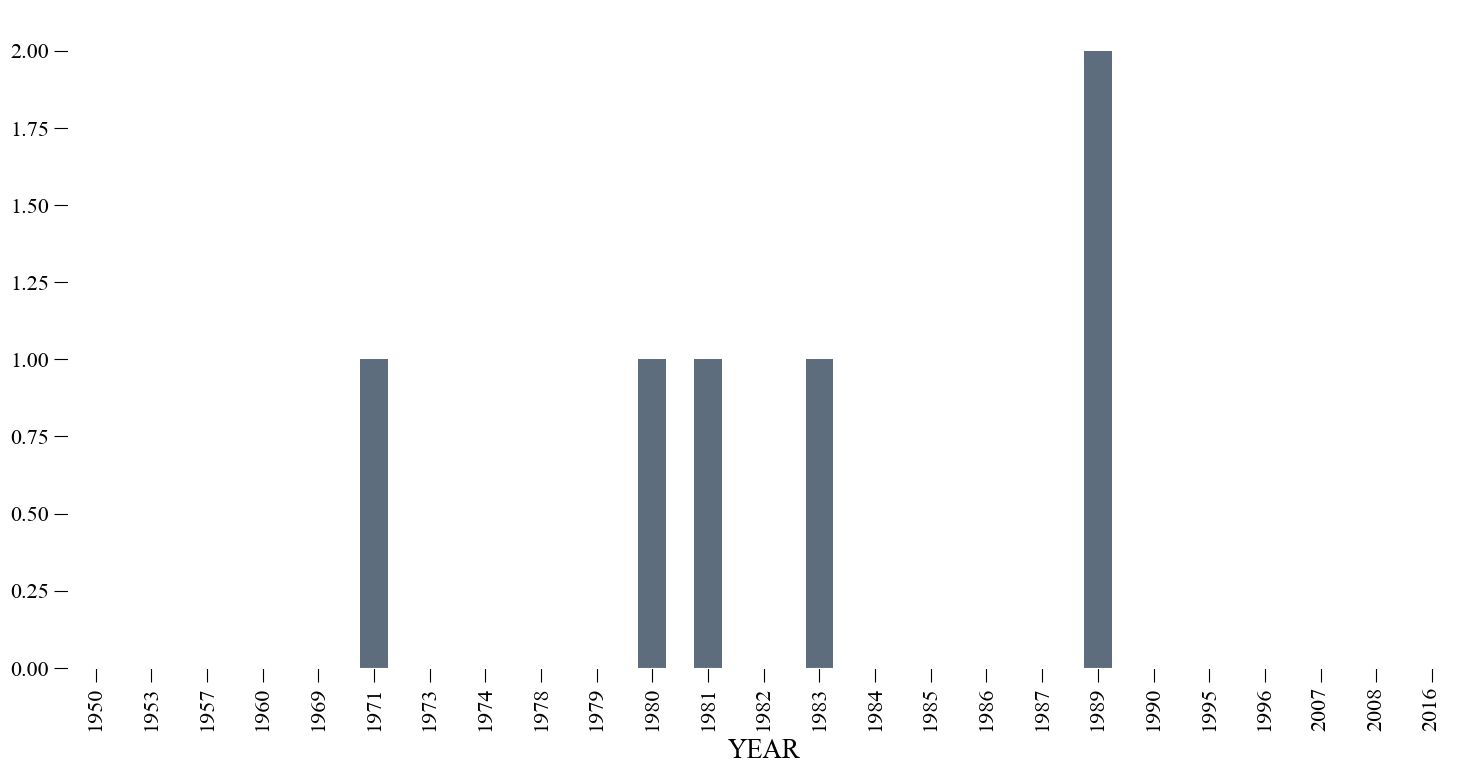

In [21]:
ax = exped[exped['PEAKID'] == 'ANN2'].groupby('YEAR').total_deaths.sum().plot(kind='bar',figsize=(16,8), color='#5d6d7e')

plt.show()
plt.savefig("deaths_per_year_ANN2.pdf")

In [22]:
exped.O2USED.value_counts()

False    7030
True     2556
Name: O2USED, dtype: int64

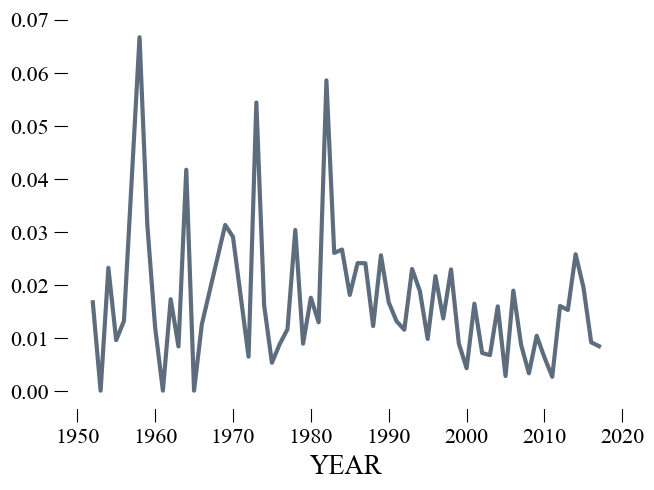

In [23]:
ax = df[df['O2USED'] == True].groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')


plt.savefig("O2_death_rate.pdf")
plt.show()

In [24]:
# ax = exped[exped['O2USED'] == True].groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')


# plt.savefig("O2_death_rate.pdf")
# plt.show()

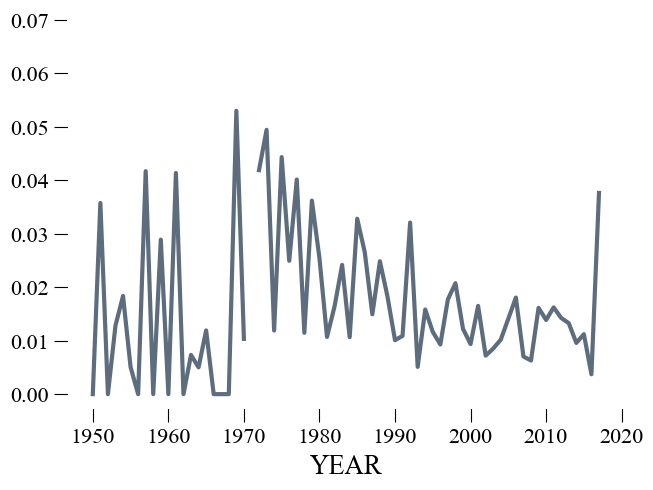

In [25]:
ax = df[df['O2USED'] == False].groupby("YEAR").total_death_rate.mean().plot(color='#5d6d7e')
ax.set_yticks([0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07])

plt.show()
plt.savefig("No_O2_death_rate.pdf")

In [26]:
df = exped[(exped.total_deaths != 0)]
df.dtypes

EXPID                object
PEAKID               object
YEAR                  int64
SEASON                int64
HOST                  int64
ROUTE1               object
ROUTE2               object
ROUTE3               object
ROUTE4               object
NATION               object
LEADERS              object
SPONSOR              object
SUCCESS1               bool
SUCCESS2               bool
SUCCESS3               bool
SUCCESS4               bool
ASCENT1              object
ASCENT2              object
ASCENT3              object
ASCENT4              object
CLAIMED                bool
DISPUTED               bool
COUNTRIES            object
APPROACH             object
BCDATE               object
SMTDATE              object
SMTTIME             float64
SMTDAYS               int64
TOTDAYS               int64
TERMDATE             object
TERMREASON            int64
TERMNOTE             object
HIGHPOINT           float64
TRAVERSE             object
SKI                  object
PARAPENTE           

In [32]:
exped.groupby('PEAKID').total_deaths.sum().sort_values(ascending=False)

PEAKID
EVER    290.0
DHA1     83.0
MANA     82.0
ANN1     71.0
CHOY     50.0
KANG     48.0
MAKA     43.0
PUMO     42.0
AMAD     28.0
KGUR     19.0
LHOT     19.0
LANG     16.0
DHA4     14.0
MAK2     13.0
HIME     13.0
BARU     13.0
GANG     11.0
PISA     11.0
LSHR     10.0
YALU     10.0
ANN3      9.0
TILI      9.0
JANU      8.0
ANNS      8.0
NUPT      7.0
ANN2      6.0
PK29      5.0
ANN4      5.0
HIUP      5.0
DHA5      4.0
APIM      4.0
GAN4      4.0
HIML      4.0
CHRW      4.0
GAN5      4.0
DHA2      4.0
GURJ      4.0
FANG      3.0
LEON      3.0
THUL      3.0
GIMM      3.0
GAN2      3.0
PUTH      3.0
ANNM      3.0
LSIS      3.0
HIMN      3.0
RAKS      2.0
TKPO      2.0
GYAC      2.0
CHOB      2.0
KWAN      2.0
DORJ      2.0
TAWO      2.0
TUKU      2.0
KOTA      1.0
FIRN      1.0
KTEG      1.0
KJRN      1.0
KAN1      1.0
NAMP      1.0
GAN1      1.0
PASA      1.0
GAN3      1.0
HIMJ      1.0
JETH      1.0
KUSU      1.0
GAUR      1.0
MARD      1.0
NILS      1.0
NAG1      1.0
NGO2      1.0

In [27]:
df.groupby('PEAKID').total_deaths.sum().sort_values(ascending=False)

PEAKID
EVER    290.0
DHA1     83.0
MANA     82.0
ANN1     71.0
CHOY     50.0
KANG     48.0
MAKA     43.0
PUMO     42.0
AMAD     28.0
KGUR     19.0
LHOT     19.0
LANG     16.0
DHA4     14.0
BARU     13.0
MAK2     13.0
HIME     13.0
GANG     11.0
PISA     11.0
LSHR     10.0
YALU     10.0
ANN3      9.0
TILI      9.0
ANNS      8.0
JANU      8.0
NUPT      7.0
ANN2      6.0
HIUP      5.0
PK29      5.0
ANN4      5.0
APIM      4.0
CHRW      4.0
DHA2      4.0
DHA5      4.0
GAN4      4.0
GURJ      4.0
HIML      4.0
GAN5      4.0
LEON      3.0
THUL      3.0
FANG      3.0
HIMN      3.0
ANNM      3.0
LSIS      3.0
PUTH      3.0
GAN2      3.0
GIMM      3.0
TAWO      2.0
DORJ      2.0
CHOB      2.0
RAKS      2.0
KWAN      2.0
GYAC      2.0
TUKU      2.0
TKPO      2.0
NGO2      1.0
BAUD      1.0
CHAK      1.0
CHAM      1.0
CHEO      1.0
CHMN      1.0
ANNE      1.0
NAMP      1.0
CHRE      1.0
NILS      1.0
PASA      1.0
LANR      1.0
NAG1      1.0
JONG      1.0
JETH      1.0
KJRN      1.0
KOTA      1.0

In [39]:
df = df[(df.total_deaths != 0.0)]

In [40]:
df.groupby('PEAKID').total_deaths.sum().sort_values(ascending=False)

PEAKID
EVER    290.0
DHA1     83.0
MANA     82.0
ANN1     71.0
CHOY     50.0
KANG     48.0
MAKA     43.0
PUMO     42.0
AMAD     28.0
KGUR     19.0
LHOT     19.0
LANG     16.0
DHA4     14.0
BARU     13.0
MAK2     13.0
HIME     13.0
GANG     11.0
PISA     11.0
LSHR     10.0
YALU     10.0
ANN3      9.0
TILI      9.0
ANNS      8.0
JANU      8.0
NUPT      7.0
ANN2      6.0
HIUP      5.0
PK29      5.0
ANN4      5.0
APIM      4.0
CHRW      4.0
DHA2      4.0
DHA5      4.0
GAN4      4.0
GURJ      4.0
HIML      4.0
GAN5      4.0
LEON      3.0
THUL      3.0
FANG      3.0
HIMN      3.0
ANNM      3.0
LSIS      3.0
PUTH      3.0
GAN2      3.0
GIMM      3.0
TAWO      2.0
DORJ      2.0
CHOB      2.0
RAKS      2.0
KWAN      2.0
GYAC      2.0
TUKU      2.0
TKPO      2.0
NGO2      1.0
BAUD      1.0
CHAK      1.0
CHAM      1.0
CHEO      1.0
CHMN      1.0
ANNE      1.0
NAMP      1.0
CHRE      1.0
NILS      1.0
PASA      1.0
LANR      1.0
NAG1      1.0
JONG      1.0
JETH      1.0
KJRN      1.0
KOTA      1.0

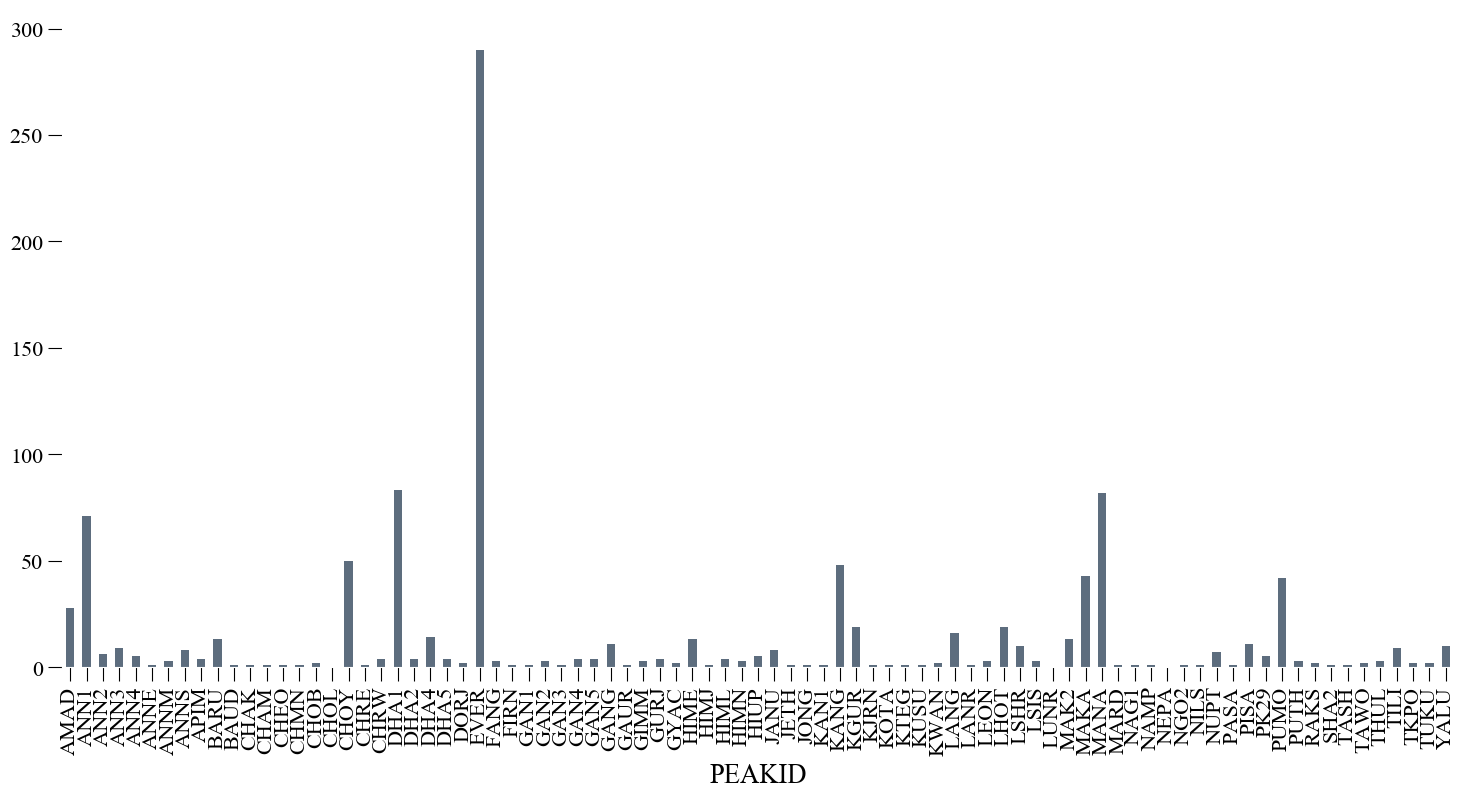

In [41]:
ax = df.groupby('PEAKID').total_deaths.sum().plot(kind='bar',figsize=(16,8), color='#5d6d7e')

plt.savefig("deaths_per_mtn.pdf")
plt.show()

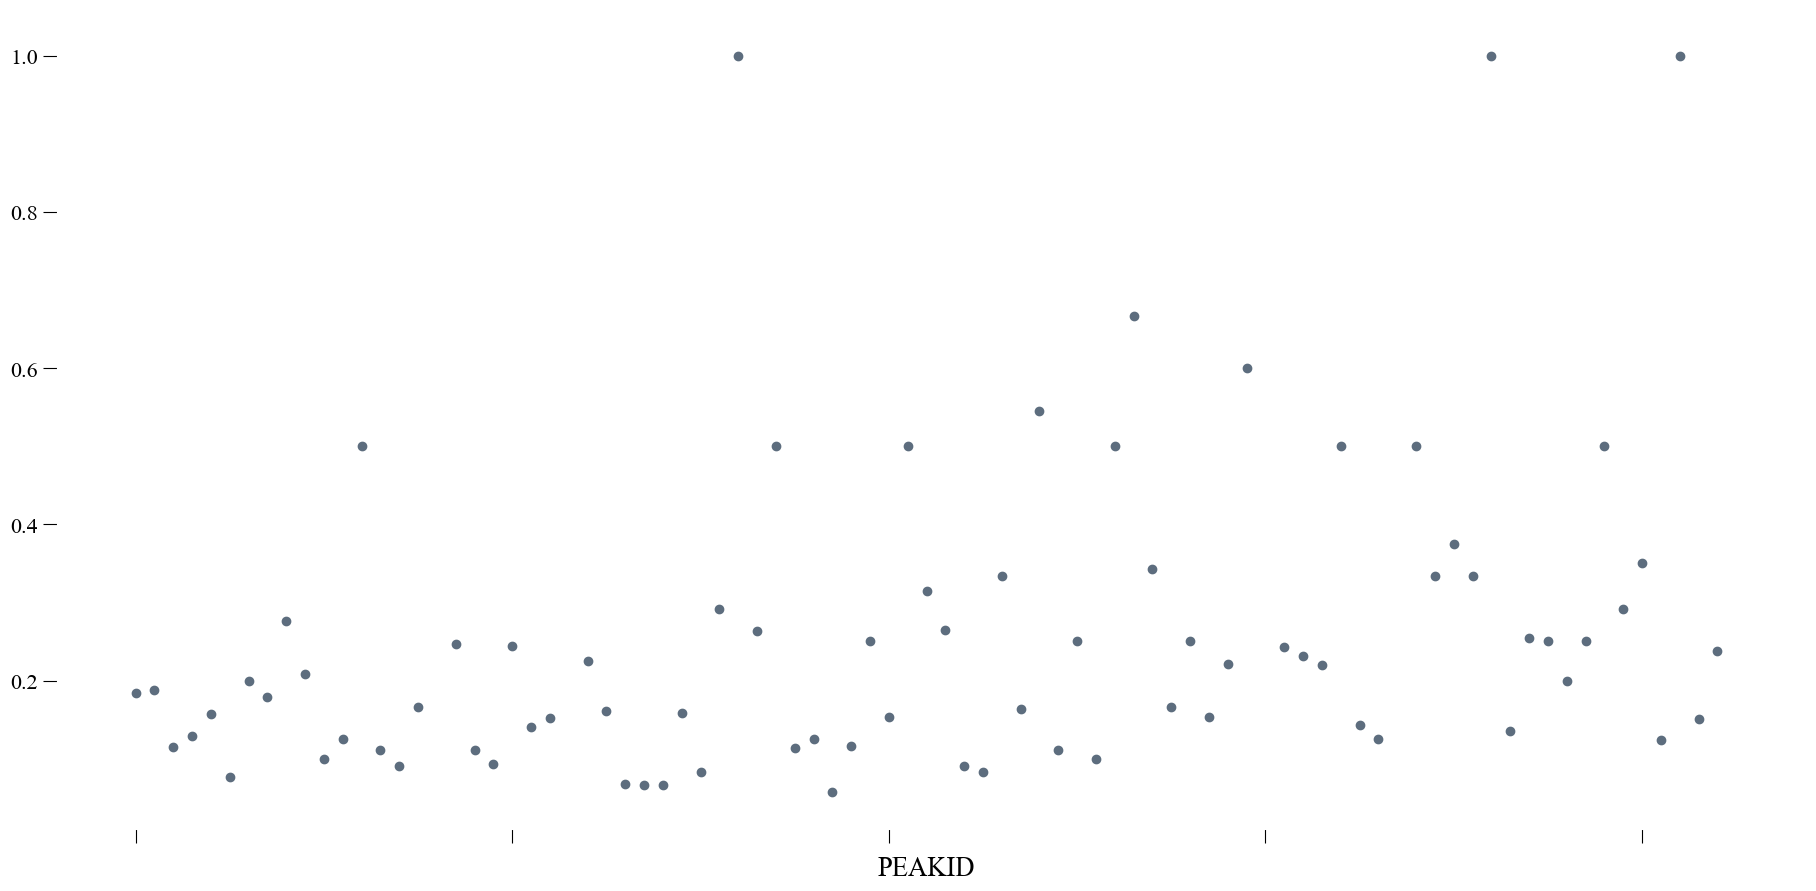

In [29]:
ax = df.groupby('PEAKID').total_death_rate.mean().plot(marker='o', linestyle='',color='#5d6d7e',figsize=(20,10))

plt.show()
plt.savefig("death_rate_per_mtn.pdf")

In [30]:
df.groupby('PEAKID').total_death_rate.mean().sort_values(ascending=False)

PEAKID
DHA5         inf
PISA    1.000000
TKPO    1.000000
GAN5    1.000000
KWAN    0.666667
LSIS    0.600000
KGUR    0.545455
KUSU    0.500000
GAUR    0.500000
MARD    0.500000
NGO2    0.500000
HIMN    0.500000
TASH    0.500000
CHAM    0.500000
NUPT    0.375227
THUL    0.350000
LANG    0.343184
PASA    0.333333
NILS    0.333333
KAN1    0.333333
HIUP    0.314286
GAN4    0.291667
TAWO    0.291667
APIM    0.276786
JANU    0.264724
GANG    0.263889
PUMO    0.254994
SHA2    0.250000
KOTA    0.250000
LEON    0.250000
HIMJ    0.250000
PUTH    0.250000
CHOY    0.246576
DHA1    0.244127
MAK2    0.242570
YALU    0.238245
MAKA    0.231682
DORJ    0.225000
LSHR    0.220942
MANA    0.219768
BARU    0.208045
RAKS    0.200000
ANNM    0.200000
ANN1    0.188013
AMAD    0.183665
ANNS    0.178788
LANR    0.166667
CHOB    0.166667
KANG    0.163544
EVER    0.160446
GAN2    0.157895
ANN4    0.156944
HIML    0.153175
LHOT    0.153074
DHA4    0.151648
TUKU    0.151316
NAG1    0.142857
DHA2    0.140212
PK29   